In [32]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets 
from sklearn.model_selection import train_test_split
from scipy import stats

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score


In [8]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [9]:
iris = datasets.load_iris()

In [11]:
df = pd.DataFrame(data=np.c_[iris['data'],iris['target']],
                 columns = iris['feature_names']+['target'])
df['species']= pd.Categorical.from_codes(iris.target,iris.target_names)
df.columns = ['s_length','s_width','p_length','p_width','target','species']
print(df.head())
len(df.index)

   s_length  s_width  p_length  p_width  target species
0       5.1      3.5       1.4      0.2     0.0  setosa
1       4.9      3.0       1.4      0.2     0.0  setosa
2       4.7      3.2       1.3      0.2     0.0  setosa
3       4.6      3.1       1.5      0.2     0.0  setosa
4       5.0      3.6       1.4      0.2     0.0  setosa


150

In [12]:
x = df[['s_length','s_width','p_length','p_width']]
y = df['species']

In [13]:
model = LinearDiscriminantAnalysis()
model.fit(x,y)

LinearDiscriminantAnalysis()

In [14]:
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)


In [16]:
scores = cross_val_score(model,x,y,scoring='accuracy',cv=cv,n_jobs=-1)
print(np.mean(scores))

0.9800000000000001


In [17]:
new = [5,3,1,4]
model.predict([new])

array(['virginica'], dtype='<U10')

In [18]:
x = iris.data
y = iris.target
model  = LinearDiscriminantAnalysis()
x_r2 = model.fit(x,y).transform(x)
target_names = iris.target_names

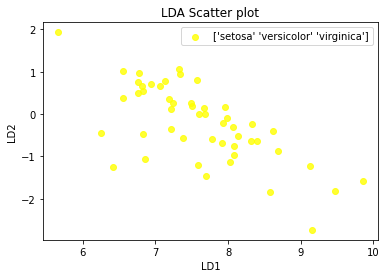

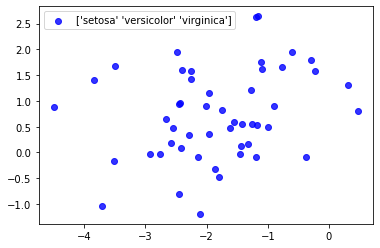

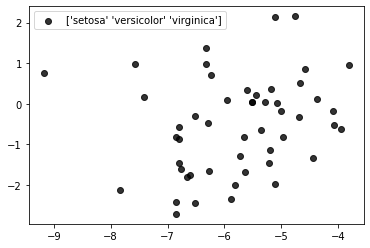

In [41]:
plt.figure()
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA Scatter plot')
colors = ['yellow','blue','black']
lw = 2
for color,i,target_name in zip(colors,[0,1,2],target_names):
    plt.scatter(x_r2[y==i,0],x_r2[y==i,1],alpha=0.8,color=color,label=target_names)
    plt.legend(loc='best',shadow=False,scatterpoints=1)
    plt.show()

In [30]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Then, proceed with your LDA fitting
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(x_train, y_train)


LinearDiscriminantAnalysis(n_components=2)

In [31]:
from sklearn.metrics import accuracy_score
y_pred = lda.predict(x_test)
print(accuracy_score(y_test,y_pred))

1.0


In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
x_r = pca.fit(x).transform(x)

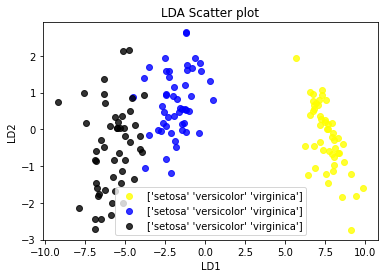

In [44]:
plt.figure()
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA Scatter plot')
colors = ['yellow', 'blue', 'black']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(x_r2[y==i, 0], x_r2[y==i, 1], alpha=0.8, color=color, label=target_names)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()  # Move this outside the loop


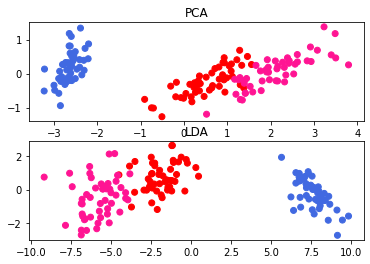

In [46]:
plt.figure()

# Define colors for each class
colors = ['royalblue', 'red', 'deeppink', 'maroon', 'tan', 'forestgreen', 'olive', 'golden']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

subplot(2, 1, 1)
title("PCA")
plt.scatter(x_r[:, 0], x_r[:, 1], c=vectorizer(y))

subplot(2, 1, 2)
title("LDA")
plt.scatter(x_r2[:, 0], x_r2[:, 1], c=vectorizer(y))

plt.show()


In [47]:
import seaborn as sns 
df = pd.DataFrame(zip(x_r[:,0],x_r[:,1],x_r2[:,0],x_r2[:,1],y),columns=["pcq","pc2","ld1","ld2","class"])

<AxesSubplot:xlabel='class', ylabel='ld2'>

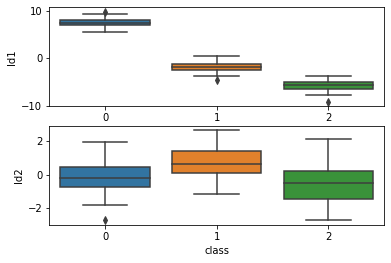

In [50]:
subplot(2,1,1)
sns.boxplot(x='class', y='ld1',data=df)
subplot(2,1,2)
sns.boxplot(x='class',y= 'ld2',data=df)